In [1]:
import os, cv2, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from keras import backend
backend.set_image_dim_ordering('th')

Using TensorFlow backend.


In [62]:
TRAIN_DIR = 'dataset/'
TEST_DIR = 'test/'

ROWS = 100
COLS = 100
CHANNELS = 3

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] 
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if '.DS_Store' not in i] # use this for full dataset

train_apples =    [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'apple' in i]
train_airplanes = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'airplane' in i]
train_bananas =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'banana' in i]
train_laptops =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'laptop' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_motorbikes =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'motorbike' in i]
train_lotuses =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'lotus' in i]

test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)if '.DS_Store' not in i]


# slice datasets for memory efficiency on Kaggle Kernels, delete if using full dataset
train_images = train_apples[:400] + train_airplanes[:400] +train_bananas[:400] + train_laptops[:40] + train_lotuses[:40] + train_motorbikes[:400]+ train_cats[:400] + train_dogs[:400]
random.shuffle(train_images)
test_images =  test_images[:28]


def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    count = len(images)
    #data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%100 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

train = prep_data(train_images)
test = prep_data(test_images)

print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Processed 0 of 2306
Processed 100 of 2306
Processed 200 of 2306
Processed 300 of 2306
Processed 400 of 2306
Processed 500 of 2306
Processed 600 of 2306
Processed 700 of 2306
Processed 800 of 2306
Processed 900 of 2306
Processed 1000 of 2306
Processed 1100 of 2306
Processed 1200 of 2306
Processed 1300 of 2306
Processed 1400 of 2306
Processed 1500 of 2306
Processed 1600 of 2306
Processed 1700 of 2306
Processed 1800 of 2306
Processed 1900 of 2306
Processed 2000 of 2306
Processed 2100 of 2306
Processed 2200 of 2306
Processed 2300 of 2306
Processed 0 of 28
Train shape: (2306, 3, 64, 64)
Test shape: (28, 3, 64, 64)


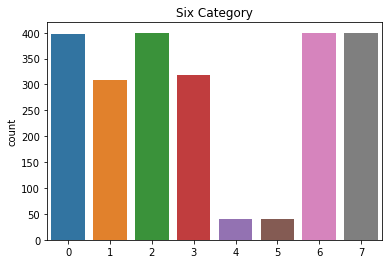

In [63]:
labels = []
for i in train_images:
    if 'apple' in i:
        labels.append(1)
    elif 'airplane' in i:
        labels.append(2)
    elif 'bird' in i:
        labels.append(3)
    elif 'bus' in i:
        labels.append(4)    
 
    elif 'cat' in i:
        labels.append(5) 
    elif 'dog' in i:
        labels.append(6)    
    else:
        labels.append(0)

sns.countplot(labels)
plt.title('Six Category')

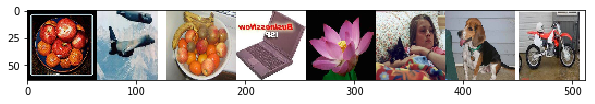

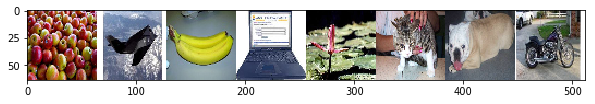

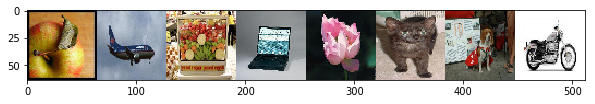

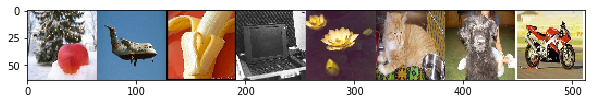

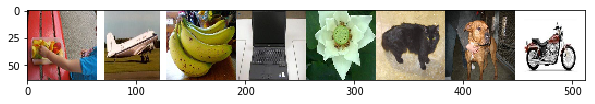

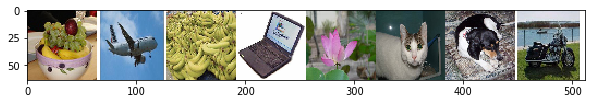

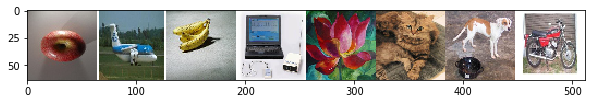

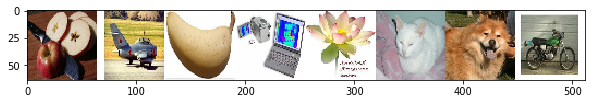

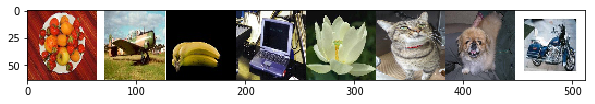

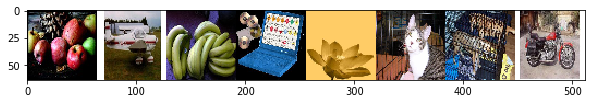

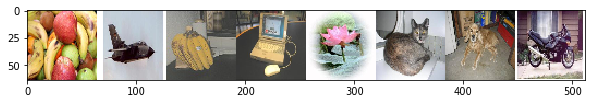

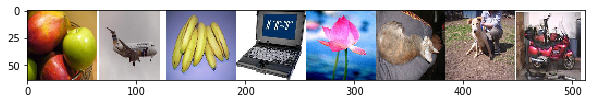

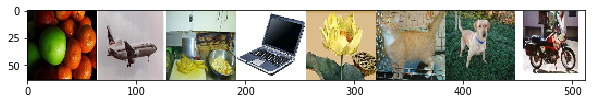

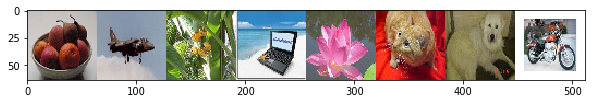

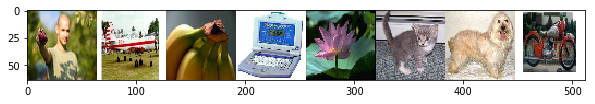

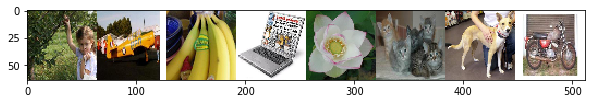

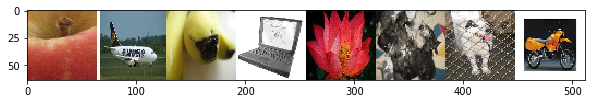

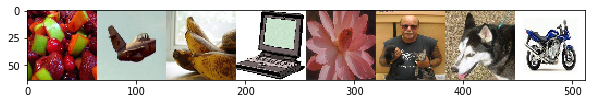

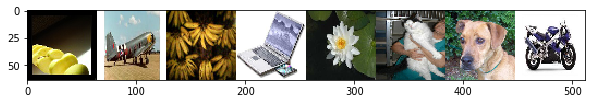

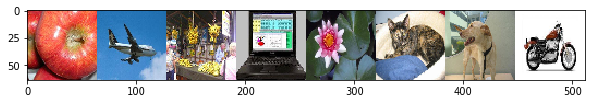

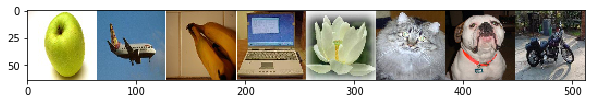

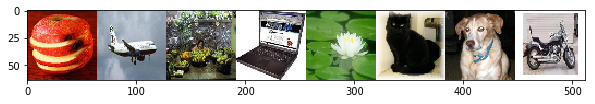

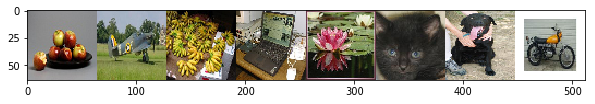

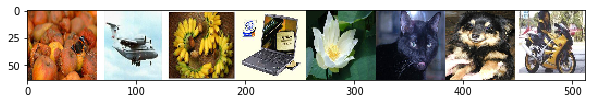

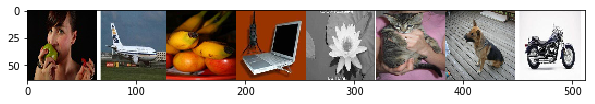

In [64]:
def show_apples_and_peaches(idx):
    apple = read_image(train_apples[idx])
    airplane = read_image(train_airplanes[idx])
    laptop = read_image(train_laptops[idx])
    banana = read_image(train_bananas[idx])
    lotus = read_image(train_lotuses[idx])
    cat = read_image(train_cats[idx])
    dog = read_image(train_dogs[idx])
    motorbike = read_image(train_motorbikes[idx])
    pair = np.concatenate((apple, airplane, banana, laptop, lotus, cat, dog, motorbike), axis=1)
    plt.figure(figsize=(10,8))
    plt.imshow(pair)
    plt.show()
    
for idx in range(0,25):
    show_apples_and_peaches(idx)

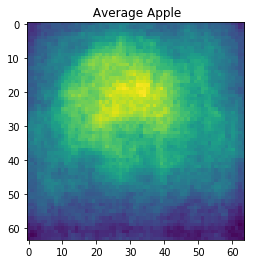

In [65]:
apple_avg = np.array([apple[0].T for i, apple in enumerate(train) if labels[i]==1]).mean(axis=0)
plt.imshow(apple_avg)
plt.title(' Average Apple')

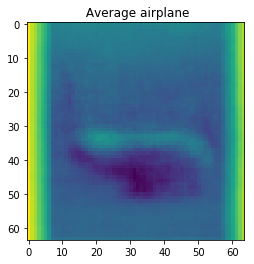

In [66]:
airplane_avg = np.array([airplane[0].T for i, airplane in enumerate(train) if labels[i]==2]).mean(axis=0)
plt.imshow(airplane_avg)
plt.title(' Average airplane')

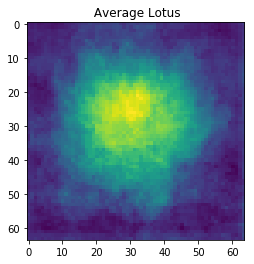

In [67]:
lotus_avg = np.array([lotus[0].T for i, lotus in enumerate(train) if labels[i]==5]).mean(axis=0)
plt.imshow(lotus_avg)
plt.title(' Average Lotus')

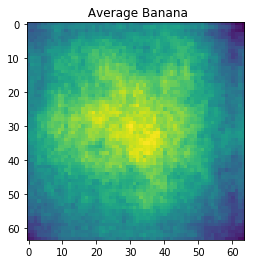

In [68]:
banana_avg = np.array([banana[0].T for i, banana in enumerate(train) if labels[i]==3]).mean(axis=0)
plt.imshow(banana_avg)
plt.title(' Average Banana')

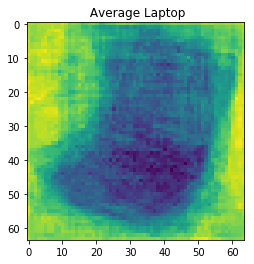

In [69]:
laptop_avg = np.array([laptop[0].T for i, laptop in enumerate(train) if labels[i]==4]).mean(axis=0)
plt.imshow(laptop_avg)
plt.title(' Average Laptop')

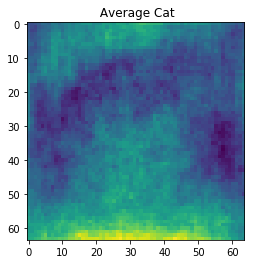

In [70]:
cat_avg = np.array([cat[0].T for i, cat in enumerate(train) if labels[i]==6]).mean(axis=0)
plt.imshow(cat_avg)
plt.title(' Average Cat')

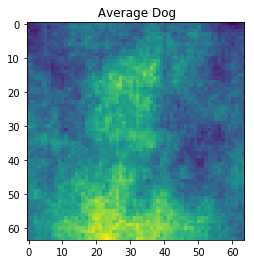

In [71]:
dog_avg = np.array([dog[0].T for i, dog in enumerate(train) if labels[i]==7]).mean(axis=0)
plt.imshow(dog_avg)
plt.title(' Average Dog')

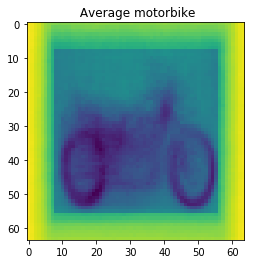

In [72]:
motorbike_avg = np.array([motorbike[0].T for i, motorbike in enumerate(train) if labels[i]==0]).mean(axis=0)
plt.imshow(motorbike_avg)
plt.title(' Average motorbike')

In [73]:
x_val=np.asarray(train[:10]) 
y_val=np.asarray(labels[:10])
print(x_val)
print(y_val)

[[[[255 255 255 ..., 255 255 255]
   [255 255 255 ..., 255 255 255]
   [255 255 255 ..., 255 255 255]
   ..., 
   [ 69  69  66 ...,  82  79  85]
   [ 58  57  60 ...,  77  79  77]
   [253 253 253 ..., 254 255 255]]

  [[255 255 255 ..., 255 255 255]
   [255 255 255 ..., 255 255 255]
   [255 255 255 ..., 255 255 255]
   ..., 
   [130 130 127 ..., 136 130 137]
   [130 129 132 ..., 135 131 129]
   [252 253 252 ..., 251 251 251]]

  [[255 255 255 ..., 255 255 255]
   [255 255 255 ..., 255 255 255]
   [255 255 255 ..., 255 255 255]
   ..., 
   [185 185 182 ..., 190 185 191]
   [193 192 195 ..., 202 200 198]
   [255 255 255 ..., 255 255 255]]]


 [[[255 255 255 ..., 255 255 255]
   [255 255 255 ..., 255 255 255]
   [255 255 255 ..., 255 255 255]
   ..., 
   [255 255 255 ..., 255 255 255]
   [255 255 255 ..., 255 255 255]
   [255 255 255 ..., 255 255 255]]

  [[255 255 255 ..., 255 255 255]
   [255 255 255 ..., 255 255 255]
   [255 255 255 ..., 255 255 255]
   ..., 
   [255 255 255 ..., 255 25

In [36]:
import keras.backend as K
optimizer = RMSprop(lr=1e-4)
objective = 'sparse_categorical_crossentropy'

def f2_score(y_true, y_pred):
    y_true = tf.cast(y_true, "int32")
    y_pred = tf.cast(tf.round(y_pred), "int32") # implicit 0.5 threshold via tf.round
    y_correct = y_true * y_pred
    sum_true = tf.reduce_sum(y_true, axis=1)
    sum_pred = tf.reduce_sum(y_pred, axis=1)
    sum_correct = tf.reduce_sum(y_correct, axis=1)
    precision = sum_correct / sum_pred
    recall = sum_correct / sum_true
    f_score = 5 * precision * recall / (4 * precision + recall)
    f_score = tf.where(tf.is_nan(f_score), tf.zeros_like(f_score), f_score)
    return tf.reduce_mean(f_score)

def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def applepeach():
    
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(3,ROWS, COLS), activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),data_format="channels_first"))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),data_format="channels_first"))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),data_format="channels_first"))
    
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),data_format="channels_first"))

#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(8))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy', f1_score])
    return model


model = applepeach()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 64, 64)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 64, 64)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 32, 32)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 32, 32)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 16, 16)       73856     
__________

In [40]:
nb_epoch = 10
batch_size = 16

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_f1s.append(logs.get('f1_score'))
        self.val_losses.append(logs.get('val_loss'))
        
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')        
        
def run_applepeach():
    
    history = LossHistory()
    model.fit(train, labels, batch_size=batch_size, epochs=nb_epoch,
              validation_split=0.25, verbose=0, shuffle=True, callbacks=[history, early_stopping],initial_epoch=0)
    predictions = model.predict(test, verbose=0)
    return predictions, history

predictions, history = run_applepeach()
print(predictions)
print(history)

[[  2.95685787e-08   9.50876176e-01   8.42893132e-05   9.99642968e-01
    3.00563920e-06   1.29625487e-05   2.66856455e-06   1.65394566e-04]
 [  9.99990582e-01   3.87268190e-10   4.12274970e-09   1.70925829e-09
    4.64107579e-08   6.55425381e-10   3.03516101e-10   5.08011055e-09]
 [  1.80835250e-05   8.25307429e-01   3.36580770e-03   9.97729123e-01
    3.58597288e-04   1.85576989e-03   3.43027321e-04   2.17782706e-02]
 [  9.06267643e-01   2.31115482e-08   1.77331880e-01   4.46609754e-08
    1.65881204e-06   1.34463028e-06   2.19993748e-08   4.87588769e-09]
 [  2.56976564e-05   4.01456863e-01   2.94945599e-03   9.94407177e-01
    3.29656090e-04   2.23180209e-03   1.61439239e-04   5.49072726e-03]
 [  5.37848622e-02   1.88468322e-01   5.42926677e-02   1.26278996e-01
    2.43338898e-01   2.09011540e-01   4.87524062e-01   7.63596714e-01]
 [  7.58678580e-05   4.22195733e-01   1.65500294e-03   9.95624244e-01
    4.49217187e-04   9.17321909e-03   8.91279953e-04   1.77109778e-01]
 [  9.9999976

In [ ]:
y_pred=[]

In [41]:
score = model.evaluate(train, labels, verbose=0)


In [42]:
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(score)

Test score: 0.712808262124
Test accuracy: 0.717504332756
[0.71280826212421855, 0.71750433275563263, 1.3865354090050974]


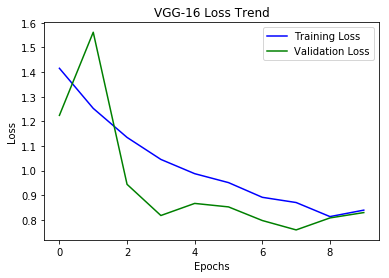

In [43]:
loss = history.losses
val_loss = history.val_losses

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG-16 Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,nb_epoch)[0::2])
plt.legend()
plt.show()

In [44]:
recall= history.val_recalls
precisions=        self.val_precisions = []

NameError: name 'self' is not defined

In [45]:

for i in range(0,28):
    print("next image to test==========="+ str(i))
    print(predictions[i])
    #index_min = np.argmin(predictions[i])
    ind = np.argmax(predictions[i])
    print(ind)

next image to test===========
[  2.95685787e-08   9.50876176e-01   8.42893132e-05   9.99642968e-01
   3.00563920e-06   1.29625487e-05   2.66856455e-06   1.65394566e-04]
3
next image to test===========
[  9.99990582e-01   3.87268190e-10   4.12274970e-09   1.70925829e-09
   4.64107579e-08   6.55425381e-10   3.03516101e-10   5.08011055e-09]
0
next image to test===========
[  1.80835250e-05   8.25307429e-01   3.36580770e-03   9.97729123e-01
   3.58597288e-04   1.85576989e-03   3.43027321e-04   2.17782706e-02]
3
next image to test===========
[  9.06267643e-01   2.31115482e-08   1.77331880e-01   4.46609754e-08
   1.65881204e-06   1.34463028e-06   2.19993748e-08   4.87588769e-09]
0
next image to test===========
[  2.56976564e-05   4.01456863e-01   2.94945599e-03   9.94407177e-01
   3.29656090e-04   2.23180209e-03   1.61439239e-04   5.49072726e-03]
3
next image to test===========
[ 0.05378486  0.18846832  0.05429267  0.126279    0.2433389   0.20901154
  0.48752406  0.76359671]
7
next image to 

testing image============== 0
Banana
I am 99.96% sure


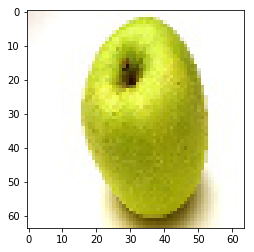

testing image============== 1
mototrbike
I am 100.00% sure


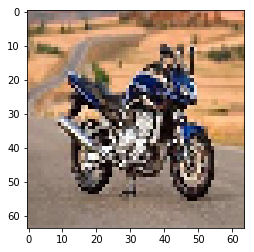

testing image============== 2
Banana
I am 99.77% sure


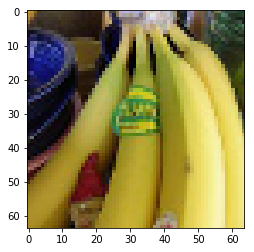

testing image============== 3
mototrbike
I am 90.63% sure


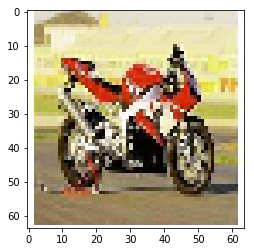

testing image============== 4
Banana
I am 99.44% sure


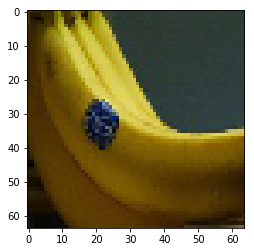

testing image============== 5
dog
I am 76.36% sure


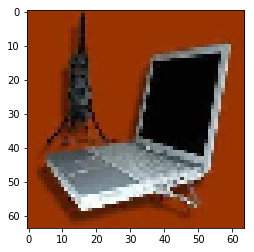

testing image============== 6
Banana
I am 99.56% sure


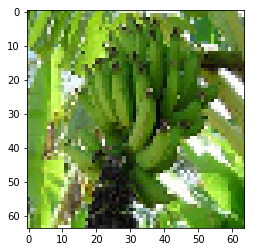

testing image============== 7
mototrbike
I am 100.00% sure


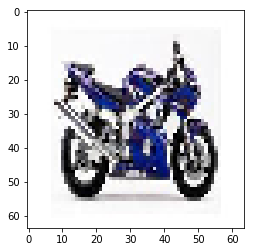

testing image============== 8
Banana
I am 99.84% sure


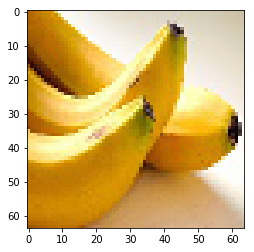

testing image============== 9
Banana
I am 99.35% sure


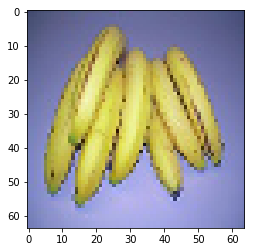

testing image============== 10
dog
I am 56.63% sure


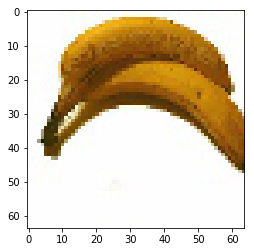

testing image============== 11
Banana
I am 61.61% sure


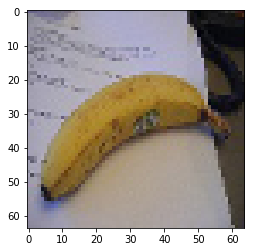

testing image============== 12
Banana
I am 99.48% sure


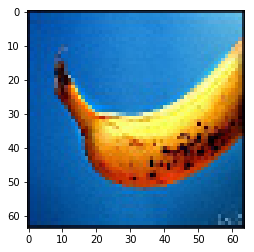

testing image============== 13
cat
I am 96.27% sure


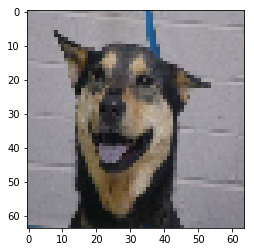

testing image============== 14
cat
I am 99.91% sure


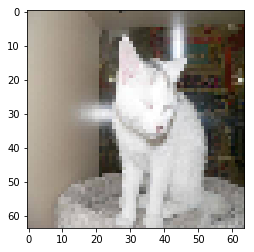

testing image============== 15
Airplane
I am 99.67% sure


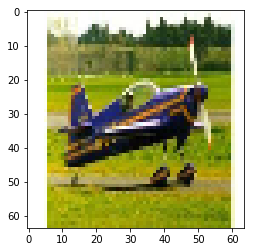

testing image============== 16
cat
I am 99.03% sure


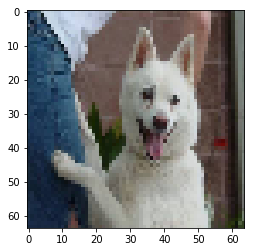

testing image============== 17
Banana
I am 94.96% sure


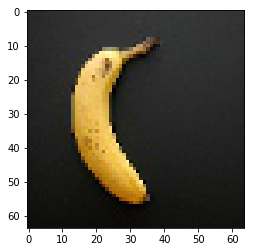

testing image============== 18
Airplane
I am 36.26% sure


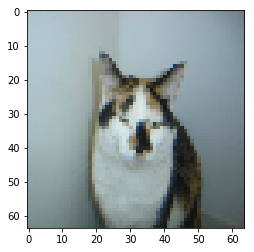

testing image============== 19
cat
I am 99.62% sure


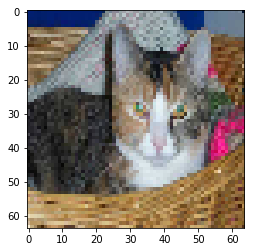

testing image============== 20
Banana
I am 99.92% sure


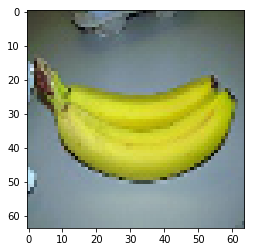

testing image============== 21
Banana
I am 97.35% sure


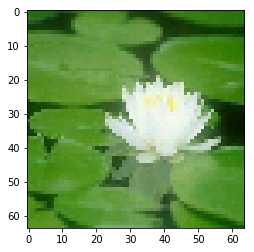

testing image============== 22
apple
I am 94.50% sure


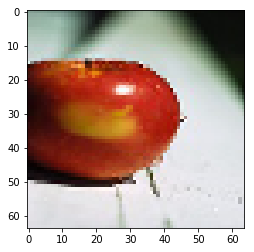

testing image============== 23
apple
I am 99.13% sure


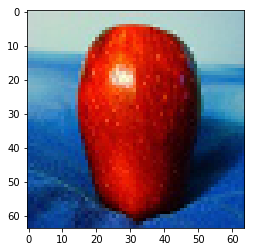

testing image============== 24
Banana
I am 98.88% sure


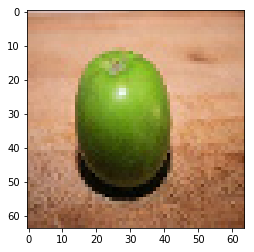

testing image============== 25
Banana
I am 52.55% sure


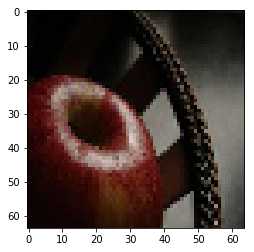

testing image============== 26
apple
I am 91.86% sure


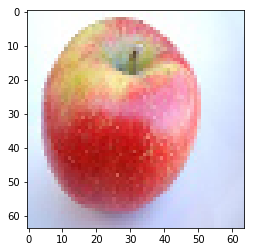

testing image============== 27
apple
I am 99.21% sure


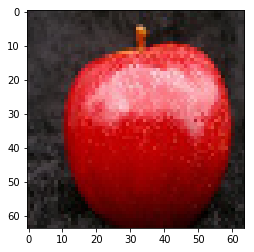

In [48]:
for i in range(0,28):
    print("testing image==============",i )
    ind = np.argmax(predictions[i])
    if ind ==0:
        print("mototrbike")
    elif ind ==1:
        print("apple")
    elif ind ==2:
        print("Airplane")
    elif ind ==3:
        print("Banana")
    elif ind ==4:
        print("Laptop")  
    elif ind ==5:
        print("Lotus")
    elif ind ==4:
        print("Lotus")  
    elif ind ==6:
        print("cat")  
    elif ind ==7:
        print("dog")     
    print("============================================================================")
    print('I am {:.2%} sure'.format(predictions[i][ind]))
      
        
    plt.imshow(test[i].T)
    plt.show()
    plt.savefig('five.png')     

In [56]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 71.75%


In [51]:
print(model.metrics_names)

['loss', 'acc', 'f1_score']


In [57]:
print("%s: %.2f%%" % (model.metrics_names[2], score[2]*100))

f1_score: 138.65%


In [59]:
print('\nTest result: %.3f loss: %.3f f1_score: %.3f' % (score[1]*100,score[0], score[2]))


Test result: 71.750 loss: 0.713 f1_score: 1.387


In [76]:
from sklearn.metrics import precision_recall_fscore_support as score
prds=[3,0,3,0,3,7,3,0,3,3,7,3,3,6,6,2,6,3,2,6,3,3,1,1,1,1]
tue= [1,0,3,0,3,4,3,0,3,3,3,3,3,7,6,2,7,3,6,6,3,5,1,1,1,1]
target_names = ['motorbike','apple', 'airplane', 'banana','laptop', 'lotus', 'cat', 'dog']
from sklearn.metrics import classification_report
print(classification_report(tue, prds, target_names=target_names))

             precision    recall  f1-score   support

  motorbike       1.00      1.00      1.00         3
      apple       1.00      0.80      0.89         5
   airplane       0.50      1.00      0.67         1
     banana       0.82      0.90      0.86        10
     laptop       0.00      0.00      0.00         1
      lotus       0.00      0.00      0.00         1
        cat       0.50      0.67      0.57         3
        dog       0.00      0.00      0.00         2

avg / total       0.70      0.73      0.71        26



/Users/mansurah/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
print(labels)

[2, 0, 7, 1, 2, 6, 7, 0, 0, 7, 0, 2, 6, 2, 2, 1, 2, 6, 7, 6, 4, 0, 6, 0, 3, 6, 7, 3, 6, 1, 3, 6, 6, 2, 0, 7, 6, 0, 7, 2, 2, 0, 0, 1, 2, 0, 1, 2, 2, 6, 0, 0, 2, 0, 7, 7, 6, 6, 6, 7, 2, 3, 2, 2, 3, 1, 7, 3, 7, 0, 7, 3, 3, 0, 7, 6, 7, 1, 7, 2, 2, 1, 1, 7, 3, 0, 0, 3, 4, 0, 6, 2, 3, 7, 3, 1, 3, 6, 6, 2, 2, 4, 7, 5, 3, 0, 0, 3, 3, 2, 6, 2, 6, 3, 4, 7, 1, 2, 6, 6, 0, 1, 3, 6, 3, 7, 1, 6, 7, 0, 0, 2, 6, 6, 2, 7, 1, 7, 7, 7, 6, 7, 2, 5, 6, 2, 0, 1, 7, 4, 1, 7, 0, 7, 0, 6, 3, 6, 7, 0, 2, 3, 3, 6, 0, 2, 3, 0, 2, 0, 7, 7, 2, 6, 2, 3, 6, 0, 6, 0, 0, 6, 1, 2, 6, 6, 3, 3, 0, 7, 0, 1, 6, 0, 6, 0, 7, 7, 6, 4, 2, 0, 3, 2, 0, 3, 4, 1, 2, 0, 7, 1, 3, 6, 6, 7, 2, 7, 3, 0, 1, 6, 6, 3, 6, 1, 3, 1, 0, 6, 2, 2, 2, 1, 7, 6, 7, 0, 2, 1, 2, 3, 7, 0, 1, 0, 5, 6, 6, 2, 2, 1, 2, 2, 3, 1, 2, 0, 3, 3, 7, 7, 2, 3, 7, 0, 2, 1, 1, 0, 6, 2, 6, 1, 1, 3, 2, 2, 1, 3, 7, 3, 7, 0, 0, 6, 5, 2, 6, 3, 4, 6, 7, 7, 1, 7, 0, 1, 0, 3, 6, 2, 7, 2, 2, 7, 4, 0, 1, 7, 7, 7, 3, 7, 0, 2, 7, 1, 3, 2, 7, 0, 1, 1, 2, 5, 0, 5, 1, 1, 7, 6, 3, 